In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import os
import sys
%matplotlib nbagg
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Introduction to OpenAI gym
- This is a great toolkit for developing and comparing Reinforcement Learning Algorithms.
- It provides many environments for agents to interact with.

In [3]:
import gym

env = gym.make('MsPacman-v0')
obs = env.reset()            #intializes the environment returning an observation.

#obs depend on the environment and this is an RGB image, 3DNumPy array of shape[width, height,channels=3]
obs.shape

(210, 160, 3)

<IPython.core.display.Javascript object>


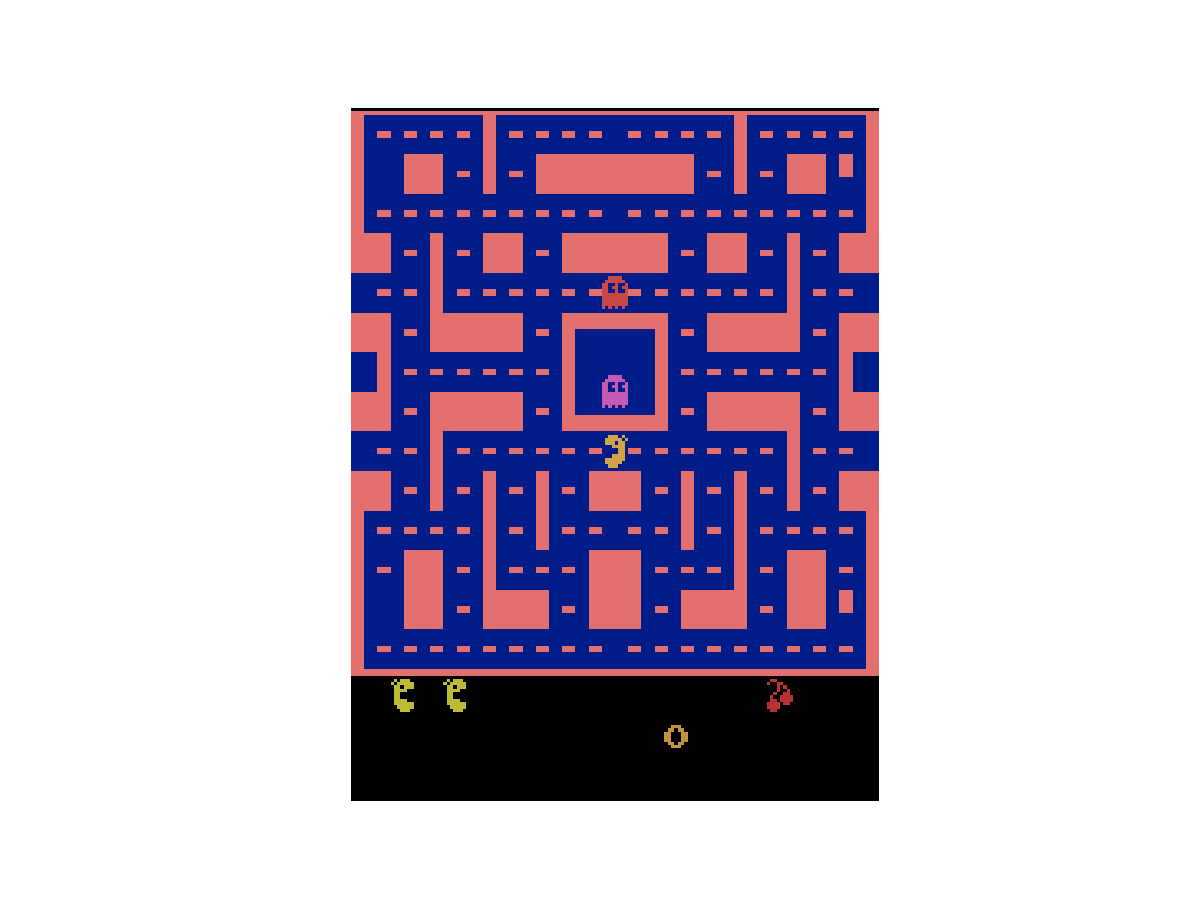

In [4]:
#An environment can be visualized by calling its render() method and also you can pick a render mode too
#this example uses set mode="rgb_array"to get an image of the environment as a NumPy Array.

img = env.render(mode="rgb_array")

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
(img == obs).all()

True

In [6]:
def plot_environment(env, figsize=(8,6)):
    plt.close()# nbagg sometimes plots in the previous cell
    plt.figure(figsize=figsize)
    img = env.render(mode='rgb_array')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [7]:
#Interact with the environment where the agent selects an action from an 'action space'
env.action_space

Discrete(9)

<IPython.core.display.Javascript object>


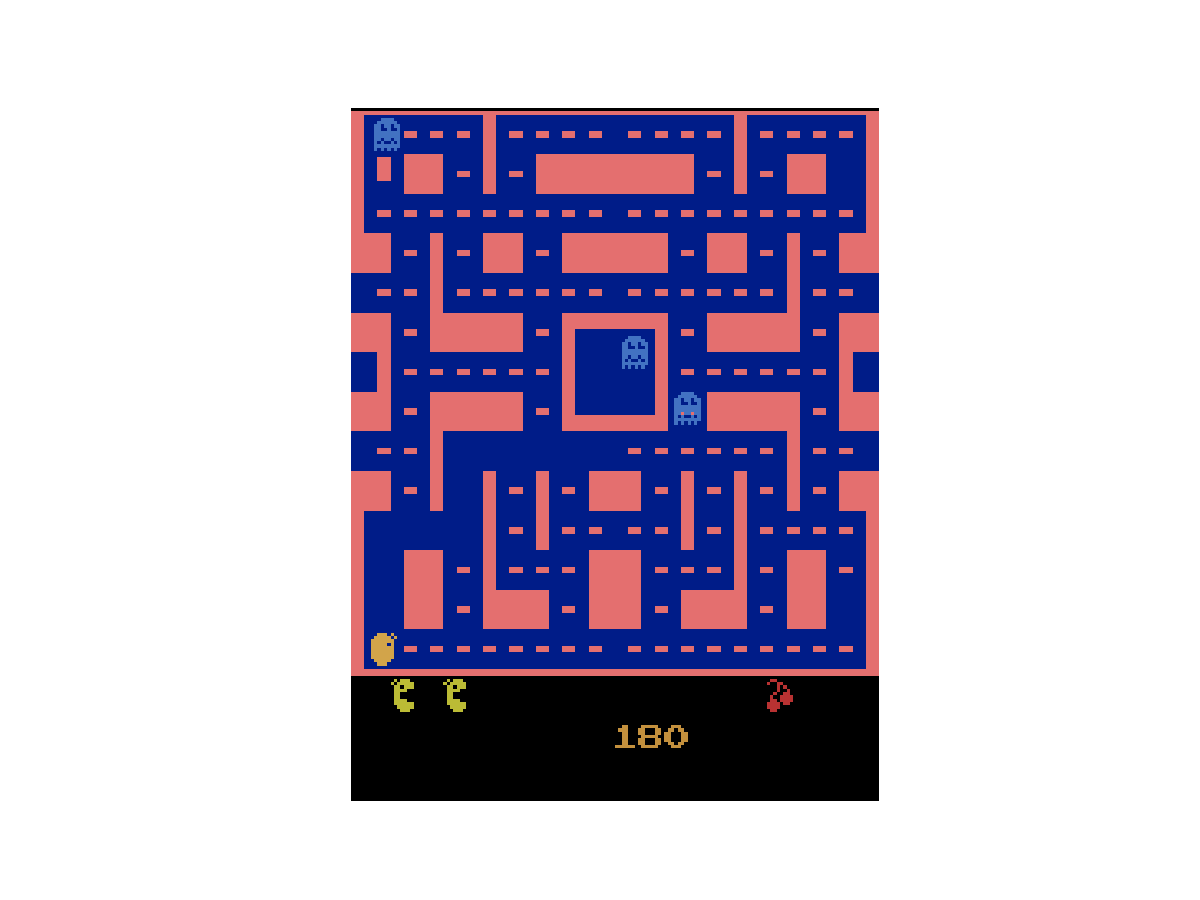

In [8]:
#Tell the environment which actions to play and compute the next step
#Discrete(9) means that the possible actions are integers 0 through 8

env.reset()
for sep in range(110):
    env.step(3)#left
for step in range(40):
    env.step(8)#lower-left
    
plot_environment(env)

In [9]:
#Step function returns several important objects
#Observation tells the agent how the environment looks like.
#The environment tells the agent how much reward it got during the last step.
#When the game is over, the environment returns done=True.
#This provides an environment-specific dictionary that contain some extra information.


obs, reward, done, info = env.step(0)
print('Observation: ',obs.shape)
print('Reward', reward)
print('Done', done)
print('Info', info)

Observation:  (210, 160, 3)
Reward 0.0
Done False
Info {'ale.lives': 3}


In [10]:
#Let's play one full game (with 3 lives), by moving in random directions for 10 steps at a time, recording each frame.

frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = env.render(mode='rgb_array')
    frames.append(img)
    if step % n_change_steps == 0:
        action = env.action_space.sample()#play randomly
    obs, reward, done, info = env.step(action)
    if done:
        break

In [11]:
#Now we show the animation 
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    plt.close()# nbagg sometimes plots the previous cell
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    return animation.FuncAnimation(fig, update_scene, fargs=(frames, patch), frames=len(frames),
                                  repeat=repeat, interval=interval)

<IPython.core.display.Javascript object>


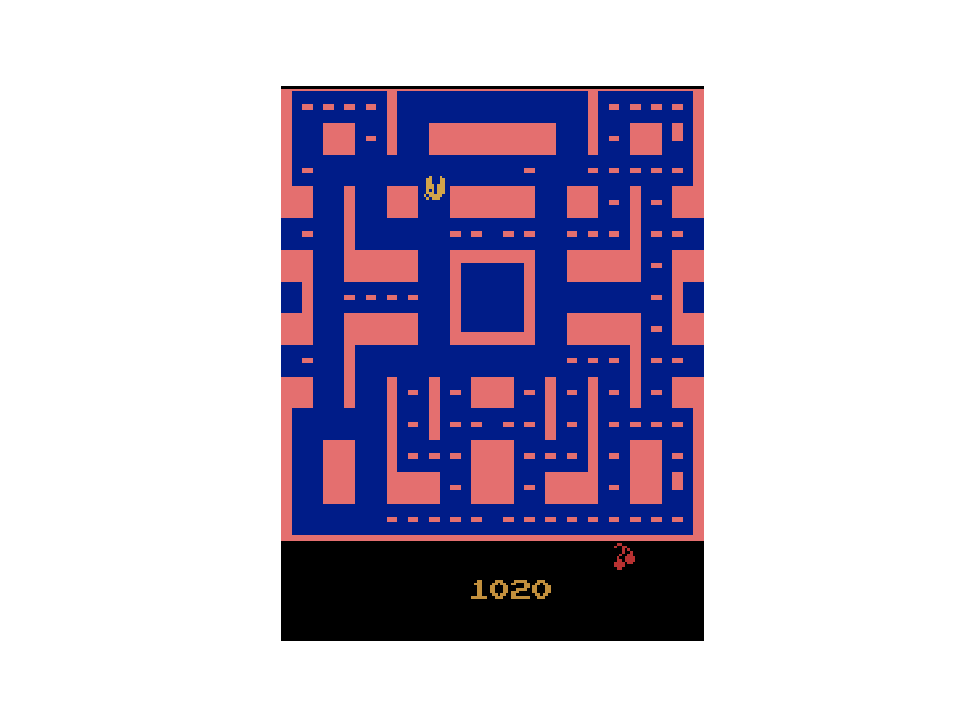

In [12]:
video = plot_animation(frames)
plt.show()

In [13]:
#Once you have finished playing with an environment, you should close it to free up resources.
env.close()

# Simple Environment: The Cart-Pole
- The Cart-Pole is a very simple environment composed of a cart that can move left or right, and pole placed vertically on top of it. The agent must move the cart left or right to keep the pole upright.

In [14]:
#The observation is a 1D NumPy array composed of 4 floats: they represent the cart's horizontal position, 
#its velocity, the angle of the pole (0 = vertical), and the angular velocity.

env = gym.make('CartPole-v0')
obs = env.reset()
print('Obsersation',obs)

Obsersation [-0.04052884 -0.048771    0.02752232  0.03846017]


In [16]:
#tf Jupyter is running on a headless server but you don't want to worry about Xvfb, then you can 
#just use the following rendering function for the Cart-Pole
from PIL import Image, ImageDraw

try:
    from pyglet.gl import gl_info
    openai_cart_pole_rendering = True   # no problem, let's use OpenAI gym's rendering function
except Exception:
    openai_cart_pole_rendering = False  # probably no X server available, let's use our own rendering function

def render_cart_pole(env, obs):
    if openai_cart_pole_rendering:
        # use OpenAI gym's rendering function
        return env.render(mode="rgb_array")
    else:
        # rendering for the cart pole environment (in case OpenAI gym can't do it)
        img_w = 600
        img_h = 400
        cart_w = img_w // 12
        cart_h = img_h // 15
        pole_len = img_h // 3.5
        pole_w = img_w // 80 + 1
        x_width = 2
        max_ang = 0.2
        bg_col = (255, 255, 255)
        cart_col = 0x000000 # Blue Green Red
        pole_col = 0x669acc # Blue Green Red

        pos, vel, ang, ang_vel = obs
        img = Image.new('RGB', (img_w, img_h), bg_col)
        draw = ImageDraw.Draw(img)
        cart_x = pos * img_w // x_width + img_w // x_width
        cart_y = img_h * 95 // 100
        top_pole_x = cart_x + pole_len * np.sin(ang)
        top_pole_y = cart_y - cart_h // 2 - pole_len * np.cos(ang)
        draw.line((0, cart_y, img_w, cart_y), fill=0)
        draw.rectangle((cart_x - cart_w // 2, cart_y - cart_h // 2, cart_x + cart_w // 2, cart_y + cart_h // 2), fill=cart_col) # draw cart
        draw.line((cart_x, cart_y - cart_h // 2, top_pole_x, top_pole_y), fill=pole_col, width=pole_w) # draw pole
        return np.array(img)

def plot_cart_pole(env, obs):
    plt.close()  # or else nbagg sometimes plots in the previous cell
    img = render_cart_pole(env, obs)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

<IPython.core.display.Javascript object>


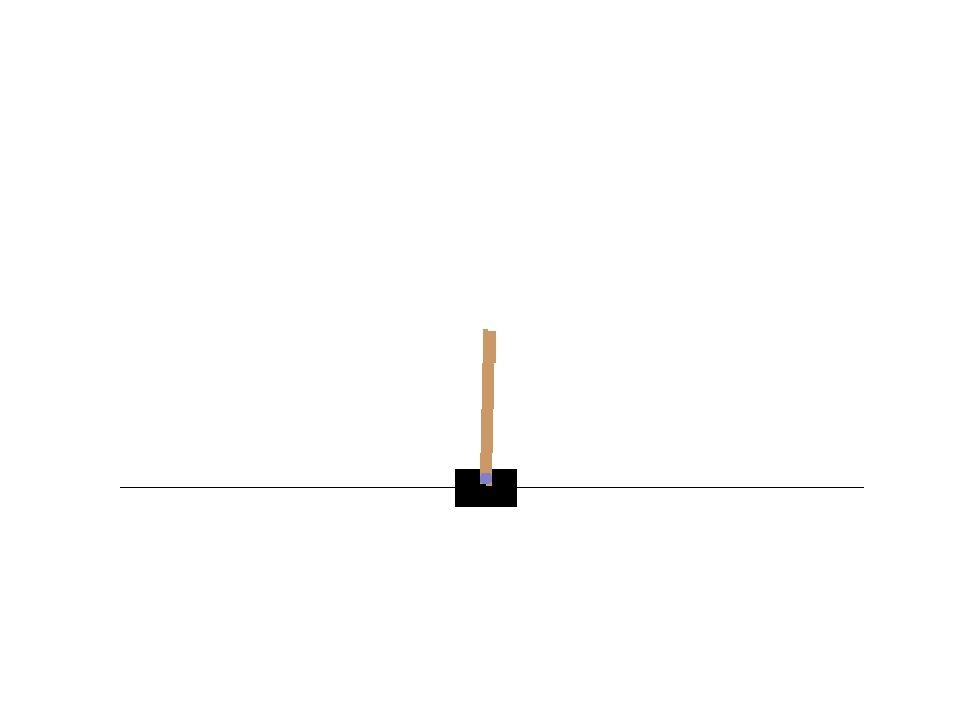

In [17]:
plot_cart_pole(env, obs)

In [18]:
#Now let's look at the action space
env.action_space

Discrete(2)

<IPython.core.display.Javascript object>


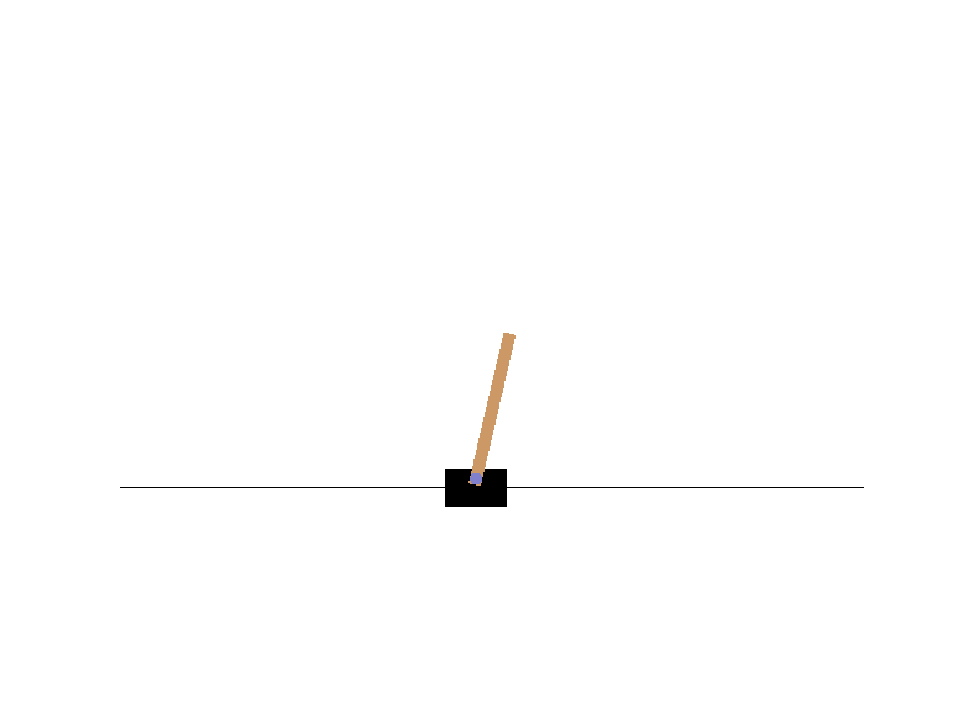

(-0.5, 599.5, 399.5, -0.5)

In [19]:
#just two possible actions: accelerate towards the left or towards the right. Let's push the cart left until the pole falls.
obs = env.reset()
while True:
    obs, reward, done, info = env.step(0)
    if done:
        break

plt.close()#nbagg sometimes plots in the previous cell.
img = render_cart_pole(env, obs)
plt.imshow(img)
plt.axis('off')

In [20]:
img.shape

(400, 600, 3)

<IPython.core.display.Javascript object>


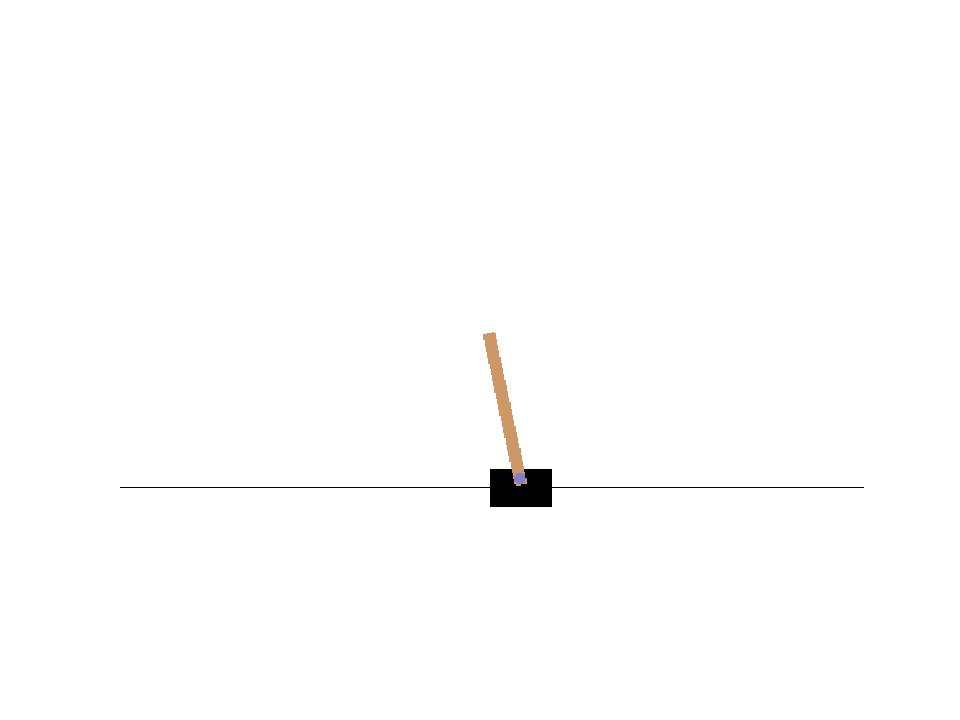

In [21]:
#Notice that the game is over when the pole tilts too much, not when it actually falls. Now let's reset the environment and push the cart to right instead.
obs = env.reset()
while True:
    obs, reward, done, info = env.step(1)
    if done:
        break
        
plot_cart_pole(env, obs)

# Simple Hard-Coded Policy
- Let's hard code a simple strategy: if the pole is tilting to the left, then push the cart to the left, and vice versa. Let's see if that works.

In [22]:
frames = []

n_max_steps = 1000
n_change_steps = 10

obs = env.reset()
for step in range(n_max_steps):
    img = render_cart_pole(env, obs)
    frames.append(img)
    
    #Hard-coded policy
    position, velocity, angle, angular_velocity = obs
    if angle < 0:
        action = 0
    else:
        action = 1
    
    obs, reward, done, info = env.step(action)
    if done:
        break

<IPython.core.display.Javascript object>


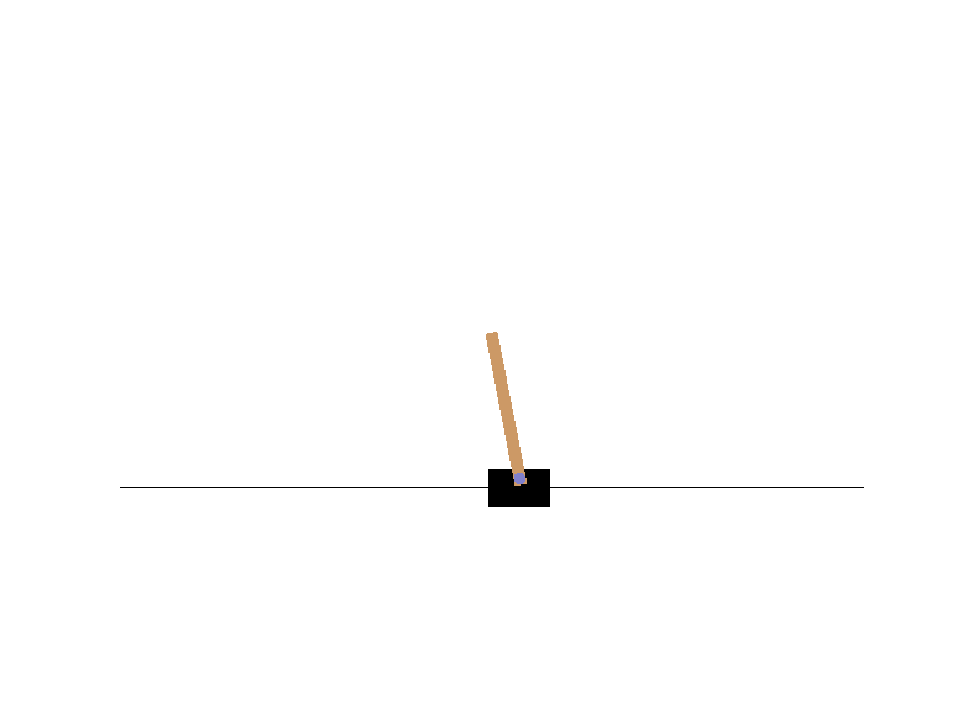

In [23]:
video = plot_animation(frames)
plt.show()

In [45]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Dot
from keras.models import load_model, model_from_json
from keras.optimizers import Adam

import gym

from collections import deque

import time

n_inputs = 4
n_hidden = 4
n_output = 1

he_init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=None)

def create_model(n_states, n_actions, he_init):
    state = Input(shape=(n_states,))
    x1 = Dense(4, kernel_initializer=he_init, activation='elu')(state)
    x2 = Dense(4, kernel_initializer=he_init, activation='elu',)(x1)
    output = Dense(n_actions, activation='sigmoid')(x2)
    
    actions = Input(shape=(n_actions,))
    output1 = Dot(axes=-1)([output, actions])
    
    #wrap the above in keras Model Class
    model = Model(inputs=[state, actions], outputs=output1)
    
    model.compile(loss='mse', optimizer='Adam')
    
    model2 = Model(inputs=state, outputs=output)
    
    return model, model2

In [51]:
frames = []

with tf.compat.v1.Session() as sess:
    sess.run()
    obs = env.reset()
    for step in range(n_max_steps):
        img = render_cart_pole(env, obs)
        frames.append(img)
        action_val = action.eval(feed_dict={X: obs.reshape(1, n_inputs)})
        obs, reward, done, info = env.step(action_val[0][0])
        if done:
            break

env.close()

TypeError: run() missing 1 required positional argument: 'fetches'